We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
#!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-08-21   21      8  2020     97       2             Afghanistan    AF   
1 2020-08-20   20      8  2020    160       8             Afghanistan    AF   
2 2020-08-19   19      8  2020      0       0             Afghanistan    AF   
3 2020-08-18   18      8  2020      3       0             Afghanistan    AF   
4 2020-08-17   17      8  2020     45       5             Afghanistan    AF   
5 2020-08-16   16      8  2020    120       7             Afghanistan    AF   
6 2020-08-15   15      8  2020      7       0             Afghanistan    AF   
7 2020-08-14   14      8  2020     79       9             Afghanistan    AF   
8 2020-08-13   13      8  2020     76      10             Afghanistan    AF   
9 2020-08-12   12      8  2020    215      32             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           2.415766           
1                                           2.268560           
2                                           2.024092           
3                                           2.239644           
4                                           2.329020           
5                                           2.210729           
6                                           1.895286           
7                                           2.318505           
8                                           2.297475           
9                                           2.097695

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       37656
day                                                           37656
month                                                         37656
year                                                          37656
cases                                                         37656
deaths                                                        37656
countriesAndTerritories                                       37656
geoId                                                         37656
countryterritoryCode                                          37592
popData2019                                                   37592
continentExp                                                  37656
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    34875
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                             \
geoId         AD     AE     AF   AG   AI     AL     AM    AO      AR     AT   
dateRep                                                                       
2019-12-31   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-01   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-02   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-03   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-04   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
...          ...    ...    ...  ...  ...    ...    ...   ...     ...    ...   
2020-08-17   0.0  210.0   45.0  0.0  0.0  120.0  168.0  27.0  6663.0  162.0   
2020-08-18  16.0  229.0    3.0  0.0  0.0  119.0   38.0  27.0  5469.0  344.0   
2020-08-19   0.0  365.0    0.0  0.0  0.0  155.0  145.0  60.0  4557.0  158.0   
2020-08-20  19.0  435.0  160.0  1.0  0.0  158.0  210.0   0.0  6840.0  425.0   
2020-08-21   0.0  461.0   97.0  0.0  0.0  155.0  263.0  49.0  6693.0  308.0   

            ... deaths                                                 
geoId       ...     VC   VE   VG   VI   VN   XK   YE     ZA   ZM   ZW  
dateRep     ...                                                        
2019-12-31  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-01  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-02  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-03  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-04  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
...         ...    ...  ...  ...  ...  ...  ...  ...    ...  ...  ...  
2020-08-17  ...    0.0  5.0  0.0  0.0  2.0  0.0  1.0  162.0  0.0  2.0  
2020-08-18  ...    0.0  7.0  0.0  0.0  1.0  0.0  5.0  143.0  4.0  3.0  
2020-08-19  ...    0.0  9.0  0.0  0.0  0.0  0.0  1.0  282.0  0.0  6.0  
2020-08-20  ...    0.0  6.0  0.0  0.0  0.0  0.0  3.0  159.0  5.0  9.0  
2020-08-21  ...    0.0  8.0  0.0  1.0  0.0  0.0  2.0  195.0  5.0  1.0  

[235 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-08-17   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-18   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-19   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-20   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-21   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-08-17 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-18 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-19 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-20 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-21 NaN  NaN NaN NaN NaN NaN NaN  

[600 rows x 420 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    600.000000
mean     299.500000
std      173.349358
min        0.000000
25%      149.750000
50%      299.500000
75%      449.250000
max      599.000000
Name: daynum, dtype: float64

The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [8]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [93]:
country  = 'BE'     # ISO2 country code
measure  = 'cases'  # can be cases or deaths
smeasure = 'scases' # smoothed
rmeasure = 'rcases' # remaining
pmeasure = 'pcases' # predicted
wmeasure = 'wcases' # waves

# Initial wave number
wave = 0

# Initialize predicted measure, create smoothed measure and remaining cases
df_geo[(pmeasure, country)] = 0
df_geo[(smeasure, country)] = df_geo[measure][country].loc[:].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

# Always plot smoothed and predicted measures, adding waves when found
plotlist = [(smeasure, country), (pmeasure, country)]

In [94]:
# Get full name and population from the original dataset
countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

# We use 1 in a million cases, but at least 10
mincases = max(popdata / 1e6, 10)
#mincases = 2

In [95]:
print('Running multiple wave analysis for {} with population {:1.0f}'.format(countryname, popdata))
print('Minimum number of cases is {:1.0f}'.format(mincases))

while True:
    # Create potential wave
    curwave = wmeasure + str(wave)
    df_geo[(curwave, country)] = 0

    # Create a dataframe for predictions
    df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                            measure:df_geo[rmeasure][country]})

    # Create the Gumbel division and select suitable measures
    df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
    df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] >= mincases)]

    # Reduce to log scale and select relevant measures
    df_pred['linear'] = np.log(df_pred['gumdiv'])
    #df_pred = df_pred[(df_pred['linear'] < -0) &
    #                  (df_pred['linear'] > -99)]

    # Do we still have data left?
    if len(df_pred) <= 1:
        print('--- no data left')
        break
    
    # Create input vectors for regression splines and build a model
    eax = df_pred['daynum'].values.reshape(-1, 1)
    eay = df_pred['linear'].values.reshape(-1, 1)

    #eamodel = Earth(minspan=0)
    eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
    eamodel.fit(eax, eay)

    # Store the results
    df_pred['earth'] = eamodel.predict(eax)

    # Find the day range
    daymin = df_pred['daynum'].min()
    daymax = df_pred['daynum'].max()

    # Find the gradient of generated regression splines
    #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
    #df_pred['eagrad'] = np.gradient(df_pred['earth'])
    df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
    df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

    # Knots are found when the gradient changes, including start and end
    df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                       (df_pred['daynum'] == (daymin + 1)) |
                       (df_pred['daynum'] == daymax))

    # Starting day of each spline
    df_pred['daycnt'] = df_pred.reset_index().index

    # Select the knots and find the actual number of days for each spline
    df_knot = df_pred[df_pred['knot']][['daynum', 'daycnt', 'linear', 'eagrad']]

    df_knot['numdays'] = df_knot['daynum'].shift(-1) - df_knot['daynum']
    df_knot['cntdays'] = df_knot['daycnt'].shift(-1) - df_knot['daycnt']
    df_knot['intline'] = df_knot['linear'].shift(-1) - df_knot['linear']
    
    # Candidate knots have a negative gradient and 5 or more days
    df_knot['cand'] = ((df_knot['eagrad'] < -1/30) &
                       (df_knot['cntdays'] >= 3))
    
    # We want early knots with a low gradient and many days
    #df_knot['since'] = df_knot['daynum'] - daymin
    #df_knot['score'] = df_knot['intline'] * df_knot['eagrad'] / -df_knot['linear']
    df_knot['score'] = - df_knot['intline'] * df_knot['cntdays']
    #df_knot['score'] = (df_knot['intline'] ** 2) + (df_knot['cntdays'] ** 2)
    df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

    # Did we find another wave?
    choice = df_knot[df_knot['choice']]
    if len(choice) == 0:
        print('--- no data left')
        break
    
    # Find the interval of the selected spline
    lower = choice['daynum'].values[0]
    upper = choice['numdays'].values[0] + lower
    df_pred = df_pred[(df_pred['daynum'] >= lower) &
                      (df_pred['daynum'] <= upper)].copy()

    # Calculate slope and intercept as basis for beta and mu
    fitmod = export.export_python_function(eamodel)
    slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
    intercept = fitmod([[lower]])[0] - (lower * slope)
    beta = - 1 / slope
    mu = beta * (intercept + np.log(beta))

    # Apply the Gumbel PDF according to beta and mu and find the scale
    df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
    df_pred['scale'] = df_pred[measure] / df_pred['pgumb']
    final = df_pred['scale'].mean()

    print('Wave {:1.0f} beta {:6.3f} with mu {:3.0f} from {:3.0f} to {:3.0f} for {:1.0f}'.format(
        wave, beta, mu, lower, upper, final))

    # Calculate the current wave and move the data from remainder to prediction
    df_geo[(curwave, country)] = final * gumpdf(df_geo['daynum'], beta, mu)
    df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
    df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]
    plotlist += [(curwave, country)]
    wave += 1

Running multiple wave analysis for Belgium with population 11455519
Minimum number of cases is 11
Wave 0 beta 15.399 with mu  99 from  92 to 114 for 62675
Wave 1 beta 17.984 with mu 221 from 197 to 231 for 26905
Wave 2 beta  4.483 with mu  69 from  66 to  73 for 375
--- no data left


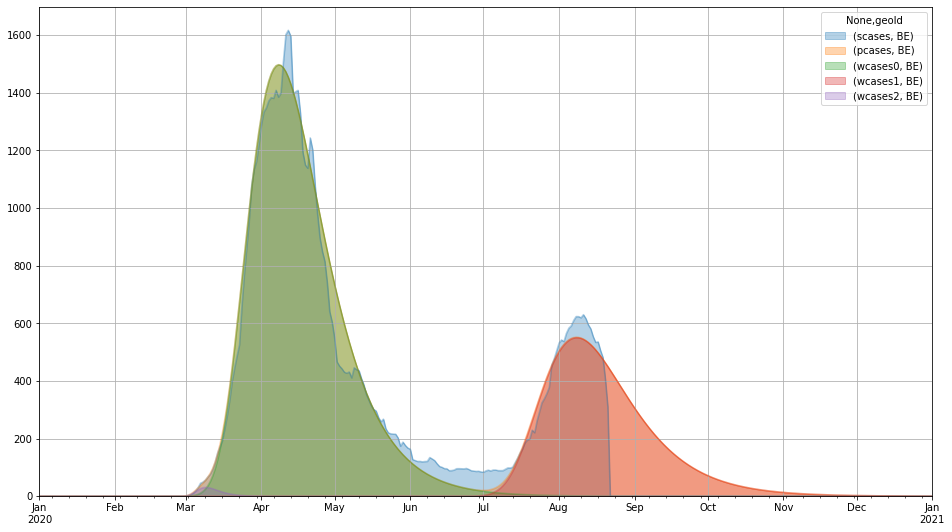

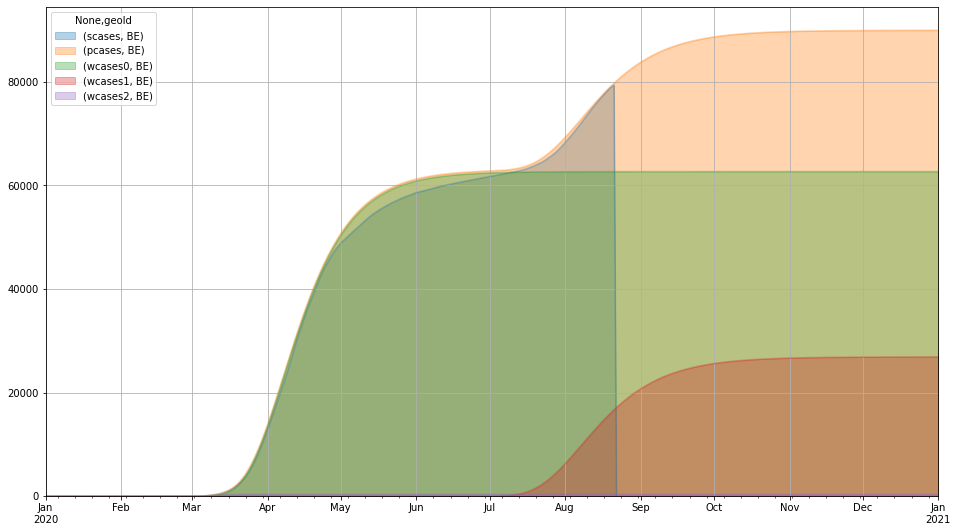

In [96]:
df_geo[plotlist].loc['20200101':'20210101'].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [97]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 89.03% of 89955


The peak can be found at the first predicted value that is larger than the next.

In [98]:
peak = df_geo[df_geo[(pmeasure, country)] == df_geo[(pmeasure, country)].max()].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-04-08


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [99]:
print('Peak by last mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by last mu at 2020-03-09


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [100]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-11-04


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [101]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-04


We define the maximum delta as the day in the curve with the sharpest rise.

In [102]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 81 on 2020-03-25


This should match the maximum gradient of the daily data.

In [103]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 81


Back to the original curve, showing the number of infected concurrently.

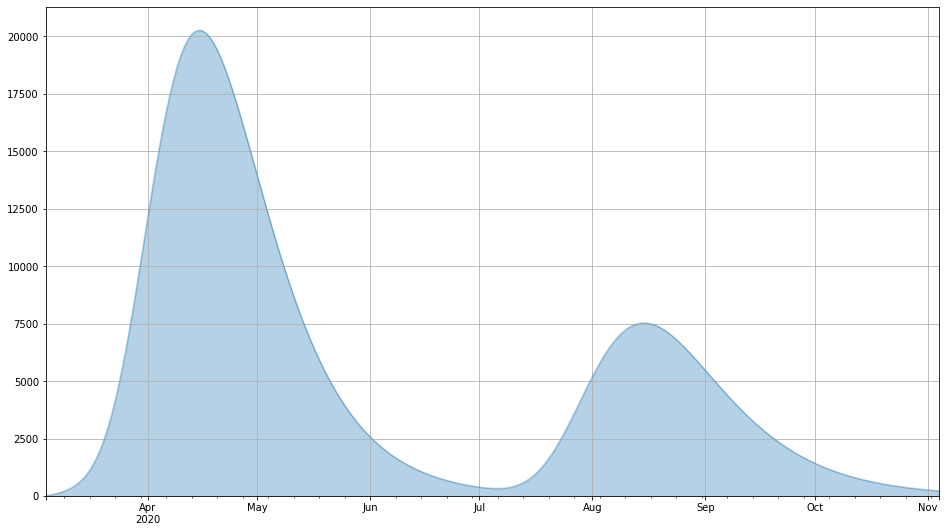

In [104]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

The top of this curve gives the maximum number of people that are infected at the same time.

In [105]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 20271


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

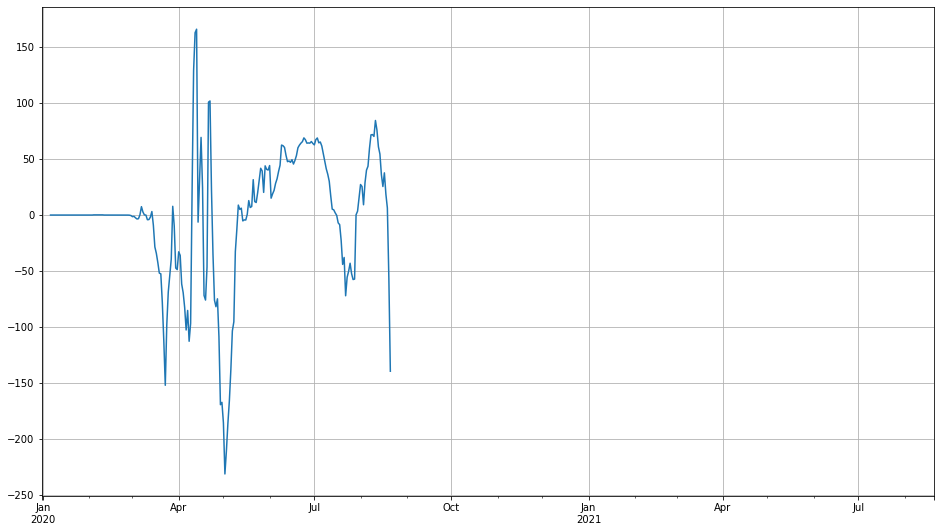

In [106]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot(
    figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.